In [1]:
%%capture
!python3 -m pip install pandas nba_api tqdm

In [10]:

import pandas as pd
from tqdm import tqdm
from nba_api.stats.endpoints import boxscorescoringv2
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('seaborn-dark')
matplotlib.rcParams['font.family'] = ['Inter', 'sans-serif']


/var/folders/kn/3gxxlz990_32dc43rfrm6vlm0000gn/T/ipykernel_21737/2132297584.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [3]:
nba_teams = teams.get_teams()
print(nba_teams[0])
all_nba_teams = [team['id'] for team in nba_teams]

# make a 
team_df = pd.DataFrame.from_records(nba_teams)
team_df


{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Georgia', 'year_founded': 1949}


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [4]:
sorted_team_df = team_df.sort_values(by='year_founded', ascending=True)
print(f"The {sorted_team_df.iloc[0,1]} were established earliest, in {sorted_team_df.iloc[0, -1]}")
print(f"The {sorted_team_df.iloc[-1,1]} were established latest, in {sorted_team_df.iloc[-1, -1]}")

The Boston Celtics were established earliest, in 1946
The New Orleans Pelicans were established latest, in 2002


In [20]:


df = pd.DataFrame()
for team_id in tqdm(all_nba_teams):
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
    games = gamefinder.get_data_frames()[0]
    games = games[games['GAME_ID'].apply(lambda x: x.startswith('002'))]
    df = pd.concat([df, games], axis=0, ignore_index=True)
    time.sleep(1)

df = df.reset_index(drop=True)
df

100%|██████████| 30/30 [00:35<00:00,  1.19s/it]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612737,ATL,Atlanta Hawks,0022201216,2023-04-09,ATL @ BOS,L,241,114,...,0.789,16.0,34.0,50.0,27,11.0,5,9,12,-6.0
1,22022,1610612737,ATL,Atlanta Hawks,0022201205,2023-04-07,ATL vs. PHI,L,264,131,...,0.679,4.0,34.0,38.0,32,11.0,7,20,19,-5.0
2,22022,1610612737,ATL,Atlanta Hawks,0022201191,2023-04-05,ATL vs. WAS,W,239,134,...,0.875,12.0,36.0,48.0,30,10.0,5,16,23,18.0
3,22022,1610612737,ATL,Atlanta Hawks,0022201182,2023-04-04,ATL @ CHI,W,241,123,...,0.895,7.0,41.0,48.0,26,5.0,7,16,18,18.0
4,22022,1610612737,ATL,Atlanta Hawks,0022201167,2023-04-02,ATL vs. DAL,W,264,132,...,0.818,16.0,37.0,53.0,28,10.0,3,9,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90849,21988,1610612766,CHH,Charlotte Hornets,0028800062,1988-11-12,CHH @ ATL,L,238,111,...,0.813,14.0,21.0,35.0,30,12.0,2,19,26,NaN
90850,21988,1610612766,CHH,Charlotte Hornets,0028800052,1988-11-11,CHH @ WAS,L,240,87,...,0.760,11.0,32.0,43.0,22,9.0,1,23,26,NaN
90851,21988,1610612766,CHH,Charlotte Hornets,0028800024,1988-11-08,CHH vs. LAC,W,240,117,...,0.738,17.0,38.0,55.0,28,9.0,1,17,31,NaN
90852,21988,1610612766,CHH,Charlotte Hornets,0028800015,1988-11-05,CHH @ DET,L,240,85,...,1.000,21.0,19.0,40.0,18,8.0,6,11,21,NaN


In [21]:
# preview games from last season
df[df['SEASON_ID'] == '22022']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612737,ATL,Atlanta Hawks,0022201216,2023-04-09,ATL @ BOS,L,241,114,...,0.789,16.0,34.0,50.0,27,11.0,5,9,12,-6.0
1,22022,1610612737,ATL,Atlanta Hawks,0022201205,2023-04-07,ATL vs. PHI,L,264,131,...,0.679,4.0,34.0,38.0,32,11.0,7,20,19,-5.0
2,22022,1610612737,ATL,Atlanta Hawks,0022201191,2023-04-05,ATL vs. WAS,W,239,134,...,0.875,12.0,36.0,48.0,30,10.0,5,16,23,18.0
3,22022,1610612737,ATL,Atlanta Hawks,0022201182,2023-04-04,ATL @ CHI,W,241,123,...,0.895,7.0,41.0,48.0,26,5.0,7,16,18,18.0
4,22022,1610612737,ATL,Atlanta Hawks,0022201167,2023-04-02,ATL vs. DAL,W,264,132,...,0.818,16.0,37.0,53.0,28,10.0,3,9,22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88300,22022,1610612766,CHA,Charlotte Hornets,0022200071,2022-10-28,CHA @ ORL,L,239,93,...,0.667,10.0,37.0,47.0,21,3.0,4,14,18,-20.0
88301,22022,1610612766,CHA,Charlotte Hornets,0022200058,2022-10-26,CHA @ NYK,L,265,131,...,0.667,9.0,33.0,42.0,31,9.0,5,15,24,-3.0
88302,22022,1610612766,CHA,Charlotte Hornets,0022200038,2022-10-23,CHA @ ATL,W,240,126,...,0.700,14.0,38.0,52.0,28,7.0,6,13,24,17.0
88303,22022,1610612766,CHA,Charlotte Hornets,0022200017,2022-10-21,CHA vs. NOP,L,239,112,...,0.786,11.0,26.0,37.0,30,9.0,4,13,24,-12.0


In [22]:
game_lvl = df.groupby(['GAME_ID'])['PTS'].sum().reset_index()
game_lvl.columns = ['GAME_ID', 'Combined Score']
merged = df.merge(game_lvl, how="left", left_on="GAME_ID", right_on="GAME_ID")
merged['SEASON_ID'] = merged['SEASON_ID'].astype(int)

In [23]:
merged.sort_values(by='Combined Score', ascending=False)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,Combined Score
20919,21983,1610612743,DEN,Denver Nuggets,0028300255,1983-12-13,DEN vs. DET,L,315,184,...,16.0,41.0,57.0,46,7.0,7,24,43,NaN,370
88200,21983,1610612765,DET,Detroit Pistons,0028300255,1983-12-13,DET @ DEN,W,315,186,...,23.0,33.0,56.0,47,19.0,6,13,44,NaN,370
64524,22022,1610612758,SAC,Sacramento Kings,0022200902,2023-02-24,SAC @ LAC,W,291,176,...,12.0,31.0,43.0,33,18.0,3,15,28,1.0,351
27379,22022,1610612746,LAC,LA Clippers,0022200902,2023-02-24,LAC vs. SAC,L,290,175,...,7.0,35.0,42.0,39,8.0,3,25,27,-1.0,351
11629,22018,1610612741,CHI,Chicago Bulls,0021800928,2019-03-01,CHI @ ATL,W,341,168,...,11.0,51.0,62.0,30,10.0,5,16,30,7.0,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57039,21995,1610612755,PHL,Philadelphia 76ers,0029500739,1996-02-21,PHL vs. MIA,L,240,57,...,13.0,32.0,45.0,11,11.0,7,19,22,NaN,123
35958,21995,1610612748,MIA,Miami Heat,0029500739,1996-02-21,MIA @ PHL,W,240,66,...,12.0,38.0,50.0,17,6.0,3,19,22,NaN,123
69789,21996,1610612759,SAS,San Antonio Spurs,0029600997,1997-03-25,SAS vs. CLE,W,240,64,...,17.0,33.0,50.0,16,4.0,8,14,14,5.0,123
35606,22000,1610612748,MIA,Miami Heat,0020000362,2000-12-20,MIA @ CHH,L,241,56,...,8.0,25.0,33.0,15,12.0,1,17,22,-9.0,121


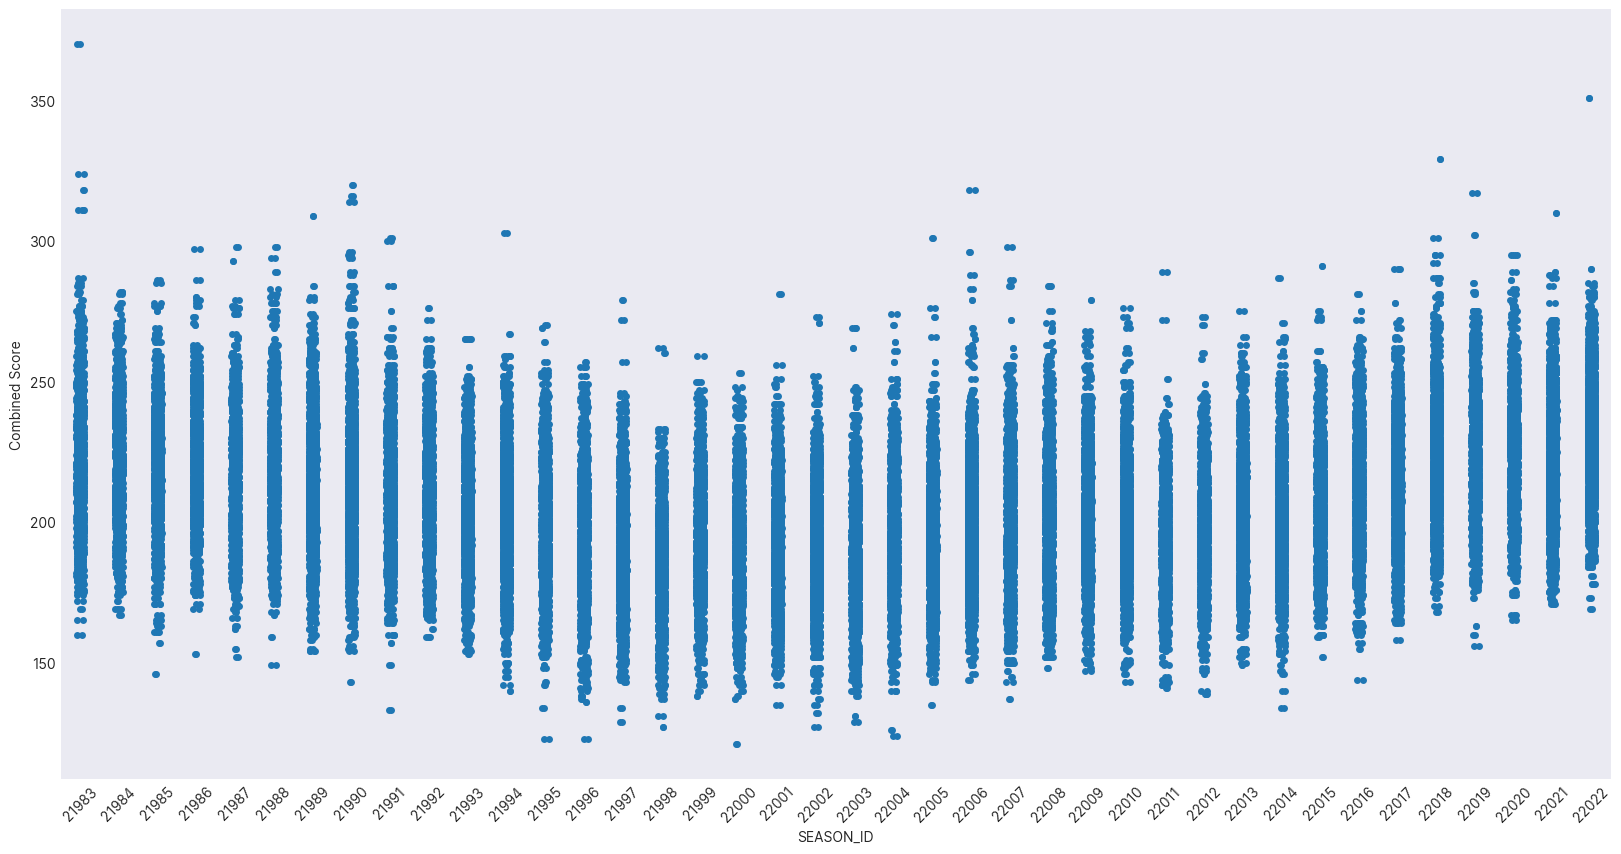

In [24]:

fig = plt.figure(figsize=(20,10))
sns.stripplot(data=merged, x='SEASON_ID', y='Combined Score')
plt.xticks(rotation=45);

In [25]:
game_lvl = df.groupby(['SEASON_ID', 'GAME_ID'])['PTS'].sum().reset_index()
grouped = game_lvl.groupby(['SEASON_ID'])[['GAME_ID', 'PTS']].agg({'GAME_ID': 'count', 'PTS': 'median'}).reset_index()
grouped

,SEASON_ID,GAME_ID,PTS
0,21983,943,219.0
1,21984,943,221.0
2,21985,943,221.0
3,21986,943,219.0
4,21987,943,216.0
5,21988,1025,218.0
6,21989,1107,213.0
7,21990,1107,210.0
8,21991,1107,210.0
9,21992,1107,209.0


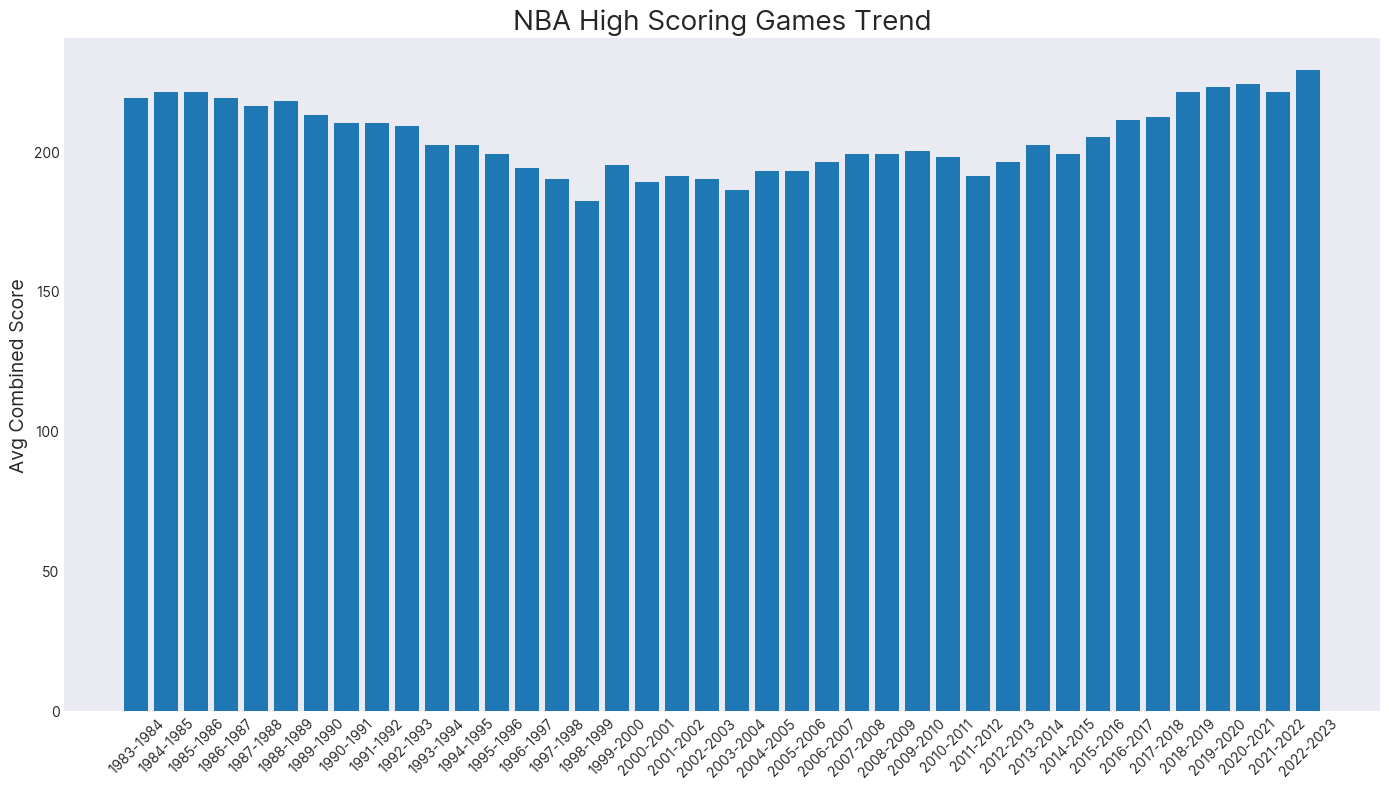

In [26]:
fig = plt.figure(figsize=(14,8))
plt.bar(grouped['SEASON_ID'].apply(lambda x: x[1:] + "-" + str(int(x[1:])+1)), grouped['PTS'])
plt.xticks(rotation=45);
plt.grid(visible=False)
plt.ylabel('Avg Combined Score', fontsize=14)
plt.title('NBA High Scoring Games Trend', fontsize=20)
fig.tight_layout()

/var/folders/kn/3gxxlz990_32dc43rfrm6vlm0000gn/T/ipykernel_21737/1593525826.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


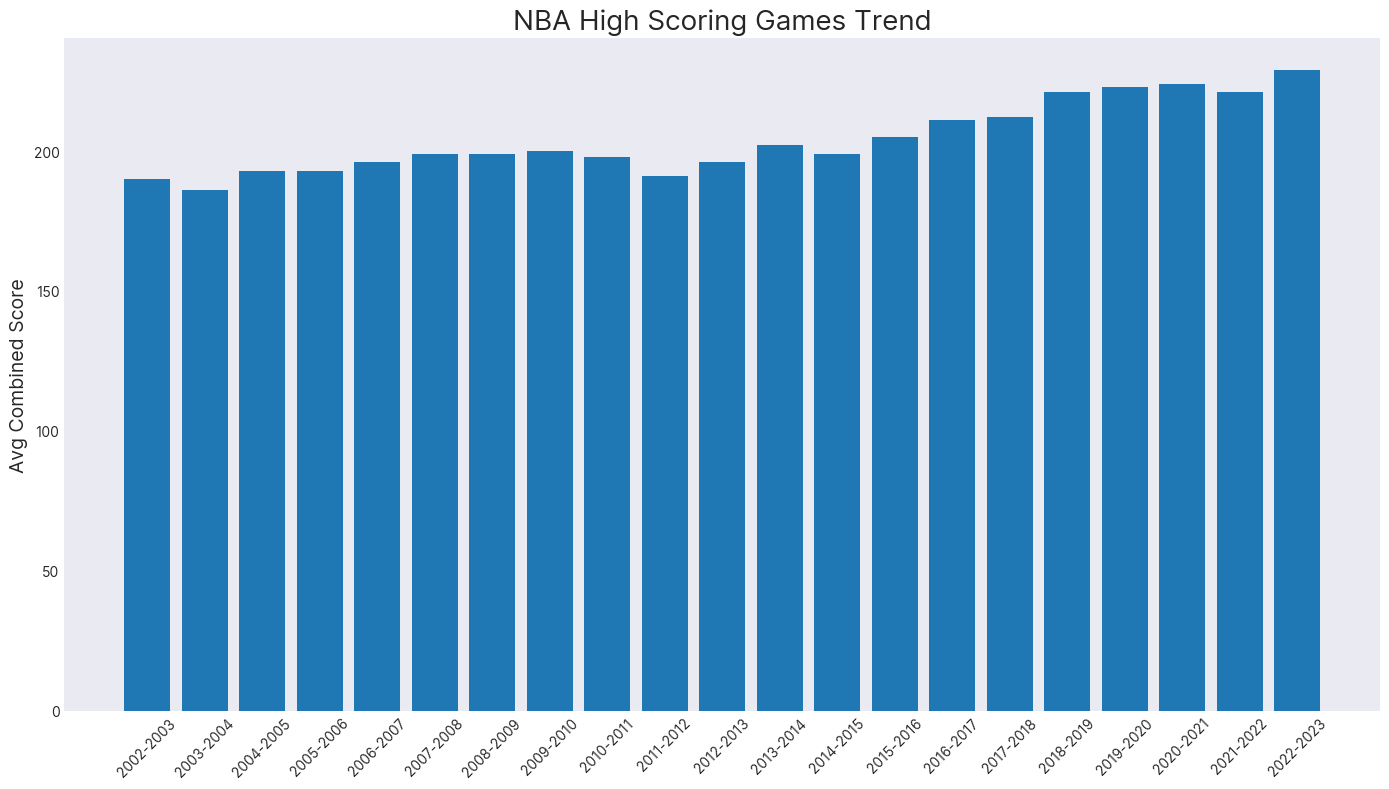

In [27]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('seaborn-dark')
matplotlib.rcParams['font.family'] = ['Inter', 'sans-serif']

fig = plt.figure(figsize=(14,8))
grouped_filtered = grouped[grouped['SEASON_ID'].astype(int) >= 22002]
plt.bar(grouped_filtered['SEASON_ID'].apply(lambda x: x[1:] + "-" + str(int(x[1:])+1)), grouped_filtered['PTS'])
plt.xticks(rotation=45);
plt.grid(visible=False)
plt.ylabel('Avg Combined Score', fontsize=14)
plt.title('NBA High Scoring Games Trend', fontsize=20)
fig.tight_layout()